In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from absbox.local.generic import Generic

test01 = Generic(
    "TEST01"
    ,{"collect":["2022-05-01","2022-06-01"] 
      ,"pay":["2022-06-15","2022-07-15"] # next distribution date
      ,"payFreq":["DayOfMonth",20]
      ,"poolFreq":"MonthEnd"
      ,"stated":"2030-01-01"}
    ,{'assets':[["Mortgage"
        ,{"originBalance":2200,"originRate":["fix",0.045],"originTerm":30
          ,"freq":"Monthly","type":"Level","originDate":"2021-02-01"}
          ,{"currentBalance":2200
          ,"currentRate":0.08
          ,"remainTerm":20
          ,"status":"current"}]]
      ,'issuanceStat':{"AccruedInterest":10000,"IssuanceBalance":2200}
     }
    ,(("acc01",{"balance":0}),)
    ,(("A1",{"balance":1000
             ,"rate":0.07
             ,"originBalance":1000
             ,"originRate":0.07
             ,"startDate":"2020-01-03"
             ,"rateType":{"Fixed":0.08}
             ,"bondType":{"Sequential":None}})
      ,("B",{"balance":1000
             ,"rate":0.0
             ,"originBalance":1000
             ,"originRate":0.00
             ,"startDate":"2020-01-03"
             ,"rateType":{"Fixed":0.00}
             ,"bondType":{"Equity":None}
             }))
    ,(("trusteeFee",{"type":{"fixFee":30}}),)
    ,{"amortizing":[
         ["payFee","acc01",['trusteeFee']]
         ,["accrueAndPayInt","acc01",["A1"]]
         ,["payPrin","acc01",["A1"]]
         ,["payPrin","acc01",["B"]]
         ,["payIntResidual","acc01","B"]
     ]}
    ,[["CollectedInterest","acc01"]
      ,["CollectedPrincipal","acc01"]
      ,["CollectedPrepayment","acc01"]
      ,["CollectedRecoveries","acc01"]]
    ,None
    ,None
    ,None
    ,{"AfterCollect":{
        "DefaultTrigger": 
         {"condition":[("poolBalance",),"<",354.03]
          ,"effects":("newStatus","Accelerated")
          ,"status":False
          ,"curable":False}}}
    ,"Amortizing"
    )

In [7]:
from absbox import API
localAPI = API("http://localhost:8081",lang='english',check=False)
#localAPI = API("https://absbox.org/api/dev",lang='english',check=False)

Connecting engine server -> http://localhost:8081

✅Connected, local lib:0.28.7, server:0.42.12

In [8]:
r = localAPI.run(test01
               ,poolAssump = ("Pool",("Mortgage",{"CDR":0.01},None,None,None)
                                       ,None
                                       ,None)
               ,runAssump = [("pricing"
                              ,{"date":"2022-07-20"
                                ,"curve":[["2021-01-01",0.025]
                                         ,["2024-08-01",0.025]]})]
               ,read=True)

Warning Message from server:
Bond B is not paid off
Account acc01 has cash to be distributed
 No waterfall distribution found on date 2023-06-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2023-07-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2023-08-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2023-09-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2023-10-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2023-11-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2023-12-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2024-01-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2024-02-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2024-03-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2024-04-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2024-05-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2024-06-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2024-07-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2024-08-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2024-09-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2024-10-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2024-11-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2024-12-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2025-01-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2025-02-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2025-03-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2025-04-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2025-05-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2025-06-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2025-07-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2025-08-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2025-09-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2025-10-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2025-11-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2025-12-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2026-01-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2026-02-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2026-03-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2026-04-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2026-05-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2026-06-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2026-07-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2026-08-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2026-09-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2026-10-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2026-11-20 with waterfall key DefaultDistribution
 No waterfall distribution found on date 2026-12-20 with waterfall key DefaultDistrib

In [30]:
import pandas as pd
from htpy import *
from htpy import tr,td,th,span,div,table

def table_(data, header=None):

    if data:
        assert len(set([len(_) for _ in data])) == 1
    if header:
        assert len(header) == len(data[0]), f"{header},{data[0]}"

    d = [ tr[ 
            [td[str(_)] for _ in r]
            ]
            for r in data]

    if not header:
        return table[d]
    else:
        print("header",header)
        h = [th[_.capitalize()] for _ in header]
        return div(".table-container")[
            table(".has-text-right table is-striped is-family-monospace is-size-7 is-bordered is-hoverable")[tr(".has-text-centered thead")[*h], *d]
        ]

def table2_(data, headers):
    "tables with multiple headers"
    d = [ tr[ [td[str(_)] for _ in r] ]
        for r in data]

    hs = [  tr[ [th(colspan=c,class_="has-text-centered")[_.capitalize()] for (_,c) in header] ]
            for header in headers ]
    #tr(".has-text-centered thead")[*h]
    return div(".table-container")[
        table(".has-text-right table is-striped is-family-monospace is-size-7 is-bordered is-hoverable")[ *hs, *d]
    ]

def pdToTbl(df:pd.DataFrame):
    def multiHeader(x):
        def buildSpan(m, y):
            if m == []:
                m.append((y,1))
                return m
            if y == m[-1][0]:
                m[-1] = (m[-1][0],m[-1][1] + 1)
            else:
                m.append((y,1))
            return m
        return [ reduce(buildSpan, [[]]+list(_)) for _ in transpose(x['columns']) ]
    
    r = df.to_dict(orient="tight")
    idxNames = ["" if x is None else x for x in r['index_names']] 
    idx = r['index']
    
    if not isinstance(r['columns'][0],tuple): 
        # branch to single column/single index
        
        # single column case
        return table_(data=[ [i]+ x for i,x in zip(idx,r['data']) ], header=idxNames+r['columns'])
    else:
        # multi column case
        padding = len(idxNames) * [("",1)]
        headers =  [ padding+x for x in multiHeader(r) ]
        headers[-1][:len(idxNames)] = [ (x,1) for x in idxNames]
        if len(idxNames) == 1:
            return table2_(data=[ [i]+ x for i,x in zip(idx,r['data']) ], headers=headers)
        else:
            return table2_(data=[ list(i)+ x for i,x in zip(idx,r['data']) ], headers=headers)


In [27]:
r['pricing']['summary'].to_dict(orient='tight')

{'index': ['A1', 'B'],
 'columns': ['pricing',
  'face',
  'WAL',
  'duration',
  'convexity',
  'accure interest'],
 'data': [[838.64, 83.864, 0.37, 0.370863, 0.011142, 0],
  [244.92, 24.492, 0.0, 0.779021, 0.0, 0]],
 'index_names': [None],
 'column_names': [None]}

In [29]:
[None,"A"].replace(None,"")

AttributeError: 'list' object has no attribute 'replace'

In [31]:
pdToTbl(r['pricing']['summary'])

header ['', 'pricing', 'face', 'WAL', 'duration', 'convexity', 'accure interest']


<Element '<div class="table-container">...</div>'>

In [25]:
r['pricing']['summary']

,pricing,face,WAL,duration,convexity,accure interest
A1,838.64,83.864,0.37,0.370863,0.011142,0
B,244.92,24.492,0.00,0.779021,0.000000,0


In [10]:
r['pricing']['summary']

,pricing,face,WAL,duration,convexity,accure interest
A1,838.64,83.864,0.37,0.370863,0.011142,0
B,244.92,24.492,0.00,0.779021,0.000000,0


In [20]:
from absbox.local.chart import viz

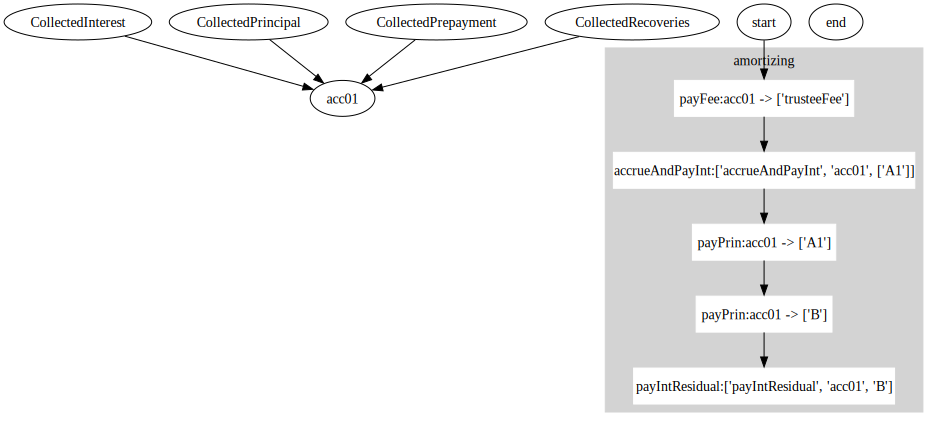

In [21]:
viz(test01)

In [22]:
from absbox.local.generic import Generic

BMW202301 = Generic(
    "BMW Auto"
    ,{"cutoff":"2022-09-30","closing":"2023-04-07","firstPay":"2023-05-26"
     ,"stated":"2060-12-01","poolFreq":"MonthEnd","payFreq":["DayOfMonth",26]}      
    ,{"assets":[]
      ,'issuanceStat':{'IssuanceBalance':8000000001.8}
      ,'cashflow':
        [["2022-10-28",7703073351,296926650.8,39621199.84]
        ,["2022-11-28",7404682416,298390935.6,38239799.05]
        ,["2022-12-28",7068698297,335984118.4,36851240.88]
        ,["2023-01-28",6754588776,314109521.1,35270038.62]
        ,["2023-02-28",6484198542,270390234,33782877.37]
        ,["2023-03-28",6213847967,270350575.7,32518759.42]
        ,["2023-04-28",5948509320,265338646.5,31253463.48]
        ,["2023-05-28",5688705557,259803763.2,30007334.46]
        ,["2023-06-28",5428759464,259946092.9,28787675.09]
        ,["2023-07-28",5175901751,252857713.1,27564949.08]
        ,["2023-08-28",4928990804,246910947.3,26372771.15]
        ,["2023-09-28",4685294315,243696488.3,25204562.17]
        ,["2023-10-28",4448845810,236448505.8,24048073.72]
        ,["2023-11-28",4215182466,233663343.6,22921167.01]
        ,["2023-12-28",3985947347,229235118.7,21803634.86]
        ,["2024-01-28",3759360916,226586431.3,20702493.3]
        ,["2024-02-28",3538894353,220466563.4,19610562.99]
        ,["2024-03-28",3323113360,215780992.7,18542390.48]
        ,["2024-04-28",3113335758,209777601.8,17492785.73]
        ,["2024-05-28",2907923173,205412585.4,16466179.14]
        ,["2024-06-28",2703346681,204576491.7,15458135.54]
        ,["2024-07-28",2511363265,191983415.7,14454511.7]
        ,["2024-08-28",2328011947,183351318.5,13500336.9]
        ,["2024-09-28",2154558970,173452976.8,12579982.71]
        ,["2024-10-28",1987657739,166901231.6,11699767.21]
        ,["2024-11-28",1826757367,160900371.7,10848388.31]
        ,["2024-12-28",1672568344,154189022.8,10025127.3]
        ,["2025-01-28",1523301145,149267198.8,9233666.38]
        ,["2025-02-28",1391357178,131943966.8,8465915.05]
        ,["2025-03-28",1265990068,125367110.5,7781807.72]
        ,["2025-04-28",1148751455,117238613.1,7127147.05]
        ,["2025-05-28",1036382880,112368574.8,6509482.45]
        ,["2025-06-28",936394625.7,99988254.23,5914372.72]
        ,["2025-07-28",851012123.3,85382502.47,5381543.83]
        ,["2025-08-28",778711315.7,72300807.56,4921856.54]
        ,["2025-09-28",721110322.3,57600993.4,4521948.54]
        ,["2025-10-28",665295441.8,55814880.46,4193570.1]
        ,["2025-11-28",610860431.7,54435010.17,3874600.17]
        ,["2025-12-28",558006506.8,52853924.88,3562862.69]
        ,["2026-01-28",506302198.1,51704308.72,3259695.55]
        ,["2026-02-28",457913355.7,48388842.39,2962622.7]
        ,["2026-03-28",410739506.7,47173848.94,2683796.57]
        ,["2026-04-28",365271282,45468224.78,2411532.19]
        ,["2026-05-28",321236485.9,44034796.02,2148403.47]
        ,["2026-06-28",279263716.2,41972769.71,1893121.68]
        ,["2026-07-28",240177960.2,39085756.02,1648962.9]
        ,["2026-08-28",203790300.9,36387659.26,1420731.37]
        ,["2026-09-28",170218846,33571454.92,1206970.51]
        ,["2026-10-28",139622059.2,30596786.79,1008386.32]
        ,["2026-11-28",111766649.5,27855409.75,826711.04]
        ,["2026-12-28",86949691.98,24816957.49,661149.47]
        ,["2027-01-28",64671479.97,22278212,513593.06]
        ,["2027-02-28",48386675.38,16284804.59,381046.4]
        ,["2027-03-28",34169784.81,14216890.57,284519.48]
        ,["2027-04-28",22935717.42,11234067.39,200345.49]
        ,["2027-05-28",13354353.39,9581364.03,133877.2]
        ,["2027-06-28",6283905.88,7070447.52,77370.71]
        ,["2027-07-28",1919297.32,4364608.56,35979.93]
        ,["2027-08-28",0,1919297.32,10964.13]
      ]
     ,"extendBy":"MonthEnd"}
      ,(("distAcc",{"balance":0})
       ,("cashReserve",{"balance":80_000_000.02
                         ,"type":{"fixReserve":80_000_000.02}})
       ,("revolBuyAcc",{"balance":0}))
    ,(("A",{"balance":6_940_000_000
          ,"rate":0.027
          ,"originBalance":6_940_000_000.00
          ,"originRate":0.027
          ,"startDate":"2023-04-03"
          ,"rateType":{"Fixed":0.027}
          ,"bondType":{"Sequential":None}})
      ,("Sub",{"balance":1_060_000_002.17
             ,"rate":0.0
             ,"originBalance":1_060_000_002.17
             ,"originRate":0.00
             ,"startDate":"2023-04-03"
             ,"rateType":{"Fixed":0.0}
             ,"bondType":{"Equity":None}}))
    ,(("serviceFee",{"type":{"annualPctFee":[("poolBalance",),0.01]}})
      ,("bmwFee",{"type":{"fixFee":0}})
      ,("admFee", {"type":{"recurFee":["MonthFirst",15000]}}))
    ,{"default":[
          ["transfer",'revolBuyAcc',"distAcc"]
         ,["transfer",'cashReserve',"distAcc"]
         ,["payFee","distAcc",["admFee"],{"support":["account","cashReserve"]}]
         ,["payFee","distAcc",["serviceFee"],{"support":["account","cashReserve"]}]
         ,["accrueAndPayInt","distAcc",["A"]]
         ,["accrueAndPayInt","cashReserve",["A"]]
        
         ,["runTrigger","ExcessTrigger"] # update the trigger status during the waterfall
        
         ,["If"
          ,[("trigger","InDistribution","ExcessTrigger"),False]  # if it was triggered 
          ,["transfer","distAcc",'cashReserve',{"reserve":"gap"}]] # trasnfer amt to cash reserver account
        
         ,["IfElse"  
           ,["status","Revolving"] # acitons in the revolving period
           ,[["transfer","distAcc",'revolBuyAcc',{"formula":("substract",("bondBalance",),("poolBalance",))}]
            ,["buyAsset",["Current|Defaulted",1.0,0],"revolBuyAcc",None] # buy asset with 1:1 if asset with performing
            ,["payIntResidual","distAcc","Sub"] ]
           ,[["payPrin","distAcc",["A"]] # actions if deal is in Amortizing status
            ,["payPrin","distAcc",["Sub"]]
            ,["payFeeResidual", "distAcc", "bmwFee"]]]]
     ,"endOfCollection":[["calcFee","serviceFee"]] # accure fee by end of collection period
     ,"cleanUp":[["sellAsset", ["Current|Defaulted",1.0,0], "distAcc"]
                 ,["accrueAndPayInt","distAcc",["A"]]
                 ,["payPrin","distAcc",["A"]]
                 ,["payPrin","distAcc",["Sub"]]
                 ,["payFeeResidual", "distAcc", "bmwFee"]]
     }
    ,(["CollectedInterest","distAcc"]
      ,["CollectedPrincipal","distAcc"]
      ,["CollectedPrepayment","distAcc"]
      ,["CollectedRecoveries","distAcc"])
    ,None
    ,None
    ,None
    ,{"BeforeDistribution":
      {"DefTrigger":
        {"condition":["any"
                      ,[">=","2024-05-26"]
                      ,[("cumPoolDefaultedRate",),">",0.016]]
        ,"effects":("newStatus","Amortizing")
        ,"status":False
        ,"curable":False}}
     ,"InDistribution":
      {"ExcessTrigger":   
        {"condition":[("accountBalance","distAcc"),">",("bondBalance","A")]
        ,"effects":("newReserveBalance","cashReserve",{"fixReserve":0}) # if was triggered, change reserve account amount to 0
        ,"status":False
        ,"curable":False}
     }
     }
    ,"Revolving"  # start deal with "Revolving" status
)

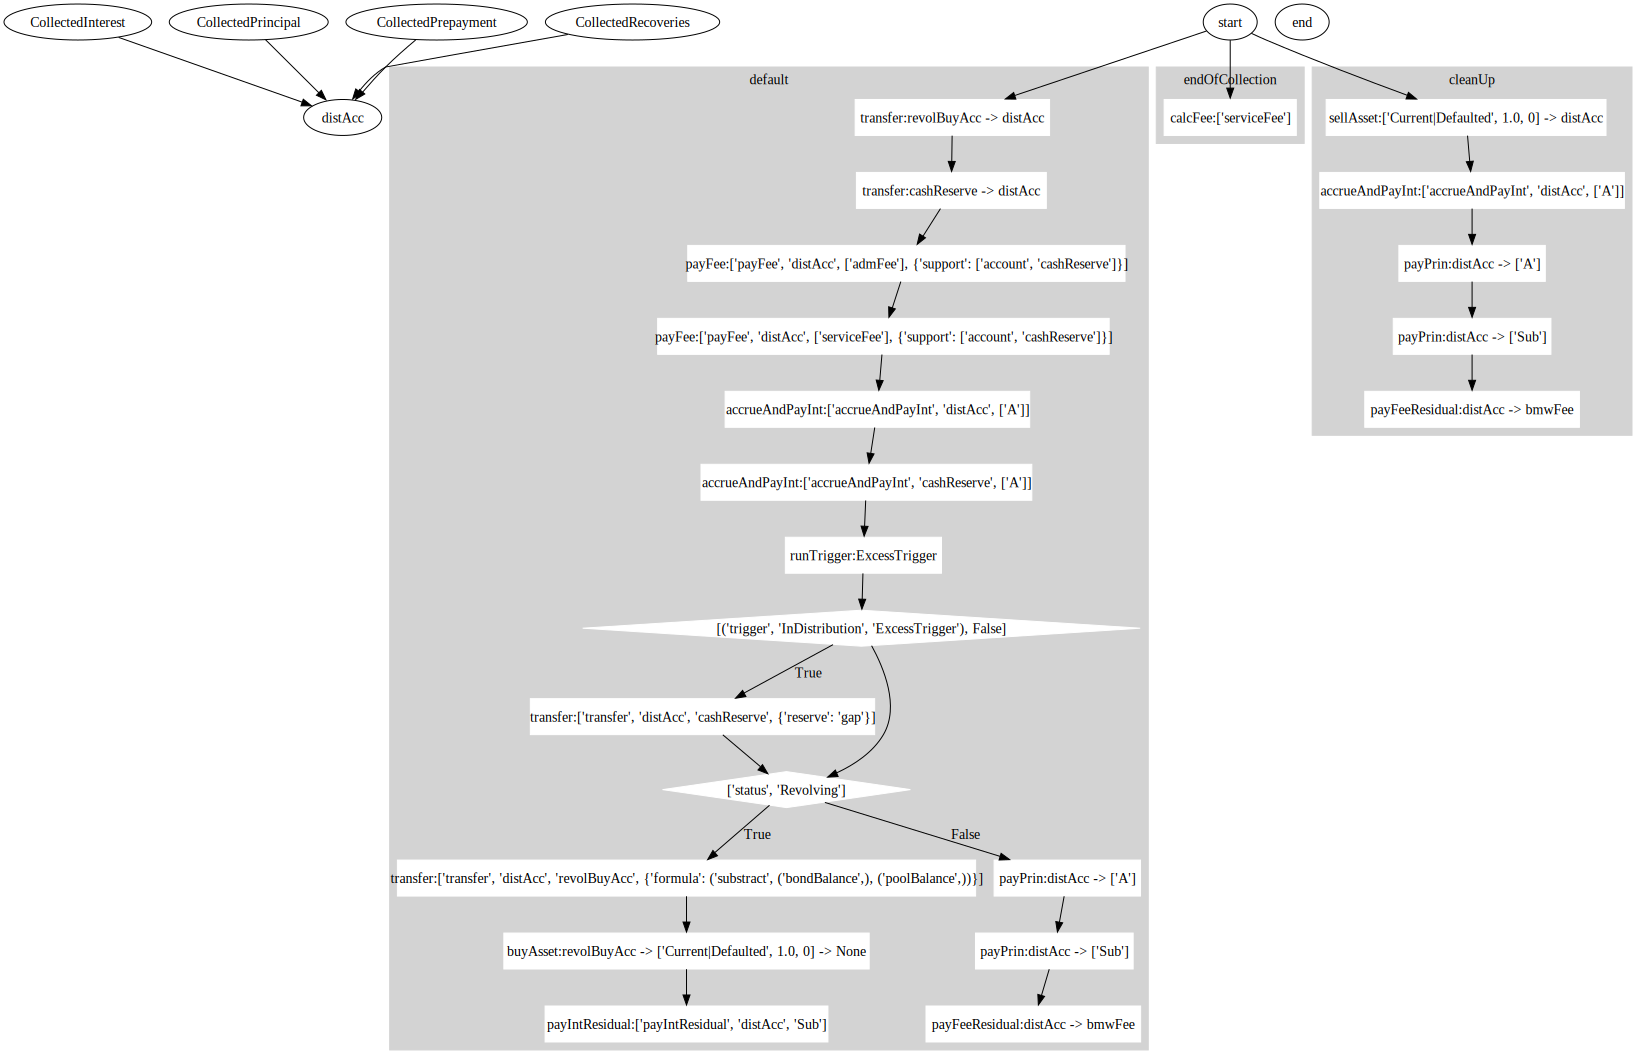

In [23]:
viz(BMW202301)

In [33]:
[1,2,3,4][:2]

[1, 2]